🌲 Random Forest Evaluation Results
• Mean Absolute Error (MAE):        27.28
• Root Mean Squared Error (RMSE):   38.98
• R² Score:                          0.902


/tmp/ipykernel_8201/4214527232.py:49: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


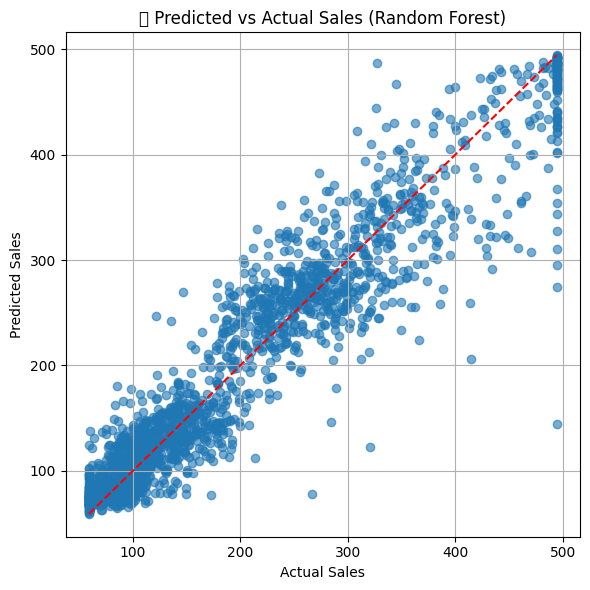

In [ ]:
# 🔹 Train and Evaluate Random Forest Model

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the cleaned dataset
df = pd.read_csv("data_clean.csv")

# Step 2: Prepare input features (X) and target variable (y)
# Remove ID, date, and target variable from features
X = df.drop(columns=['id', 'Datum', 'Umsatz'])
y = df['Umsatz']

# Step 3: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Step 7: Output the evaluation metrics
print("🌲 Random Forest Evaluation Results")
print(f"• Mean Absolute Error (MAE):        {mae:.2f}")
print(f"• Root Mean Squared Error (RMSE):   {rmse:.2f}")
print(f"• R² Score:                          {r2:.3f}")

# Step 8: Optional — Plot predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("🔍 Predicted vs Actual Sales (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()
